# Interval permutation importance

Interval importance is a model inspection technique that can be paired with any fitted classifier. The interval permutation score is defined
to be the decrease in model performance as a temporal interval is permuted among samples. The algorithm breaks the dependency between the 
interval and the label. As such, a decrease in model performance is indicative of how important that temporal interval is for the models overall
performance.

In [1]:
import matplotlib.pylab as plt
from wildboar.datasets import load_dataset
from wildboar.explain import IntervalImportance
from wildboar.ensemble import ShapeletForestClassifier
from wildboar.linear_model import RocketClassifier
from sklearn.model_selection import train_test_split

Lets start by considering this trained ROCKET classifier:

In [2]:
x, y = load_dataset("TwoLeadECG")
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
clf = RocketClassifier(n_jobs=-1)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

1.0

The models validation score, as measured as the fraction of correctly predicted time series, is much larger than random chance. As such, we can safely employ the interval importance score to explain the importane of the prediction regions.

In [3]:
importance = IntervalImportance(
    n_interval=10, scoring="accuracy", n_repeat=5, random_state=1
)
importance.fit(clf, x_test, y_test)

IntervalImportance(n_interval=10, random_state=1, scoring='accuracy')

We can then either plot the resulting importances, overlaying a sample of the time series in the validation data with the importance of the most important itervals or explore the importance scores in more detail. Lets first inspect the plot.

<AxesSubplot:>

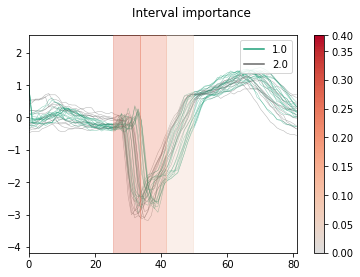

In [5]:
importance.plot(x=x_test, y=y_test, top_k=0.3, n_samples=0.1)

In [31]:
for score, label in sorted(
    zip(importance.importances_.mean, importance.intervals_),
    reverse=True,
):
    print("%s -> %.2f" % (label, score))

(26, 34) -> 0.28
(34, 42) -> 0.23
(42, 50) -> 0.07
(18, 26) -> 0.00
(74, 82) -> 0.00
(66, 74) -> 0.00
(58, 66) -> 0.00
(50, 58) -> 0.00
(9, 18) -> 0.00
(0, 9) -> 0.00


We can note that the top interval accounts for a large fraction of the models reference score of 1.0.